# Chapter 5: Sentiment analysis with the perceptron algorithm

## Importing the necessary packages

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

## Defining and plotting our dataset

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

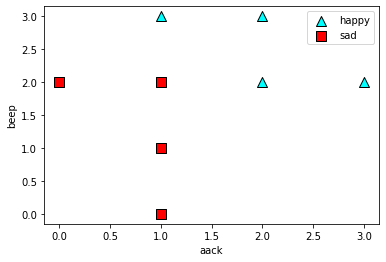

In [3]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Question 2:

>**a. How many data points are there?**

8 data points

>**b. What is represented by the x-coordinates in the scatter plot? What is represented by the y-coordinates?**

x-coordinate represents the number of aacks  
y-coordinate represents the number of beeps

>**c. In the label array, what is represented by a 0? What is represented by a 1?**

0 represent sad sentences  
1 represent happy sentences

## Coding the perceptron trick

In [4]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [5]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [6]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [7]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [8]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.02)

### Running the perceptron algorithm

In [9]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

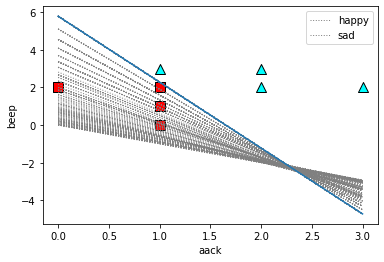

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

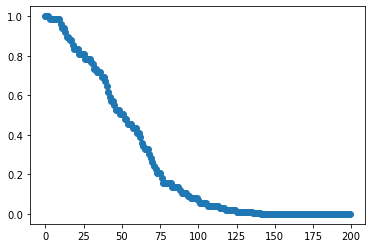

In [10]:
perceptron_algorithm(features, labels)

### Question 3:

>**a. What initial weight is given to the number of 'aacks'?  What initial weight is given to the number of 'beeps'?  What is the initial bias?**

The initial weights for both the number of aacks and beeps is 1  
The initial bias is 0

>**b. What learning rate is used? Explain how the learning rate affects the algorithm**

The learning rate used is 0.01. The learning rate controls how big the adjustments are.

>**c. Explain what an epoch is. How many epochs are used in the training?**

An epoch is the number of iterations done by an algorithm during the training.  
In this example, 200 epochs were used.

>**d. After training, what values are assigned to the 'aacks' weights, 'beeps' weight and the bias?**

Weight for aacks: 0.6299999999999997  
Weight for beeps: 0.17999999999999938  
Bias: -1.0400000000000007

>**e. What percentage of points have the correct prediction?**

Based on on the graphs above, we can observe that the model was able to classify correctly the points to a 100%. The line obtained after 200 epochs correctly divides the happy and sad area. On top of that, the error vs. epoch graph tells us that after aproximately 140 epochs all the data points have been classified with the right tag. 

>**f. From the plot of the errors vs. epoch, could less epochs have been used to achieve similar performance? Would more training have made a significant improvement?**

In order for the line to find a right fit, the model shouln't run less than 150 epochs. As we can observe in the graph, the error reaches zero couple epochs before the 150 mark. At that point, we can conclude that every data point has been correctly clasified. Less than that will result in a model that underperforms. On the other hand, more than 200 epochs would only result in a longer training time with the same output. 

>**g. Explain the meaning of stochastic, mini-batch and batch gradient descent**

Minimizing the error while training the model in order to find the best line fit using:  

**Stochastic gradient descent:** one point at a time  
**Mini-batch gradient descent:**  a batch of points  
**Batch gradient descent:** all the points in the data set

### The perceptron algorithm using Turi Create

In [11]:
import turicreate as tc 

In [12]:
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [13]:
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.001740     | 1.000000          |

| 2         | 3        | 1.003242     | 1.000000          |

| 3         | 4        | 1.004378     | 1.000000          |

| 4         | 5        | 1.005708     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [14]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


### Question 4:

>**a. After training, what values are assigned to the 'aacks' weight, 'beeps' weight and bias? Are these values different or the same as those found in the _"Running the perceptron algorithm"_ section?**

Weights aacks: 2.972553703911967  
Weights beeps: 2.498635186535742  
Bias: -8.959708265685022

These values differ from the ones in _"Running the perceptron algorithm"_ section

>**b. What percentage of points have the correct prediction? How does this compare with the results of the _"Running the perceptron algorithm"_ section?**

Based on the training accurracy of 1 in every epoch, we can conclude that 100% of the points have the correct prediction. This result is similar to the one in "Running the perceptron algorithm" section.

>**c. Is there only a single choice of weights and bias that gets the predictions correct, or are there other choices of weights and bias that would also get the predictions correct? Explain**

Taking question 4a and 4b as reference, the results using turicreate differ from the ones in the "Running the perceptron algorithm" section, yet still all the points in both approaches managed to classify them correctly. That being said , the model can have different weights and bias and still get the preditions correct.

It's also important to mention that in "Running the perceptron algorithm" section, a random.seed(0) is being used, which means that our model has been limited to produce the same output when running the code. Without it, this would result in different weights and bias that can get the predictions correct even if these are different.